<h1>Описание</h1>
<p>На этот раз данные имеют следующую структуру: </p>
<p>записываются для каждого пользователя, совершившего покупки, каждый день</p>
<p>для каждой даты есть своя папка, внутри неё – папки для каждого пользователя</p>
<p>внутри каждой папки есть файл data.csv, где и хранятся данные</p>
<p>Схематично выглядит так:</p>

Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

<h1>Задачи</h1>

<p>1 - Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)</p>
<p>2 - Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.</p>
<p>3 - Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?</p>
<p>4 - Визуализируйте продажи по дням.</p>
<p>5 - Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.</p>

<h1>1 - Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)</h1>

In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = [i for i in os.listdir('data') if not i.startswith('.')]

In [6]:
data

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [9]:
# df = pd.DataFrame()
# steps = len(data)
# k = 0
# while steps > 0:
#     file_path = f'{data[k]}//..'
    
    
#     steps -= 1
#     k += 1
# Рабочая тетрадь Python/project/karpov_4/data/2020-12-03/Alexey_Smirnov/data.csv

In [27]:
df = pd.DataFrame(columns=['product_id', 'quantity', 'name', 'date'])
file_name = 'data.csv'
path = os.getcwd()
path += '\\data'
path

'C:\\Users\\Алекс\\Рабочая тетрадь Python\\project\\karpov_4\\data'

In [38]:
for i in data:
    file_path_users = path + '\\' + i
    data_file = i
    for j in [i for i in os.listdir(file_path_users) if not i.startswith('.')]:
        file_path = file_path_users + '\\' + j + '\\' + file_name
        temp_df = pd.read_csv(file_path)
        temp_df['name'] = j
        temp_df['date'] = data_file
        df = pd.concat([df,temp_df], ignore_index=True)
df

,product_id,quantity,name,date,Unnamed: 0
0,47,1,Alexey_Smirnov,2020-12-03,0.0
1,57,1,Alexey_Smirnov,2020-12-03,1.0
2,14,2,Alexey_Smirnov,2020-12-03,2.0
3,52,1,Alexey_Smirnov,2020-12-03,3.0
4,1,4,Alexey_Smirnov,2020-12-03,4.0
...,...,...,...,...,...
317,66,4,Rostislav_Petrov,2020-12-09,1.0
318,39,2,Rostislav_Petrov,2020-12-09,2.0
319,82,4,Vasiliy_Ivanov,2020-12-09,0.0
320,74,2,Vasiliy_Ivanov,2020-12-09,1.0


In [40]:
df = df.drop_duplicates()

In [41]:
df

,product_id,quantity,name,date,Unnamed: 0
0,47,1,Alexey_Smirnov,2020-12-03,0.0
1,57,1,Alexey_Smirnov,2020-12-03,1.0
2,14,2,Alexey_Smirnov,2020-12-03,2.0
3,52,1,Alexey_Smirnov,2020-12-03,3.0
4,1,4,Alexey_Smirnov,2020-12-03,4.0
...,...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09,1.0
157,39,2,Rostislav_Petrov,2020-12-09,2.0
158,82,4,Vasiliy_Ivanov,2020-12-09,0.0
159,74,2,Vasiliy_Ivanov,2020-12-09,1.0


<h1>2 - Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.</h1>

In [53]:
top_user_2 = df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(5)

In [51]:
top_user = df.groupby('name',as_index=True).agg({'quantity':'sum'}).idxmax()

In [52]:
top_user

quantity    Alexey_Smirnov
dtype: object

In [58]:
print(top_user_2.iloc[:2].index)

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')


<h1>3 - Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?</h1>

In [66]:
top_10_products = df.groupby('product_id', as_index=False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

In [67]:
top_10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


Text(0.5, 1.0, 'Bar plot Top-10 products')

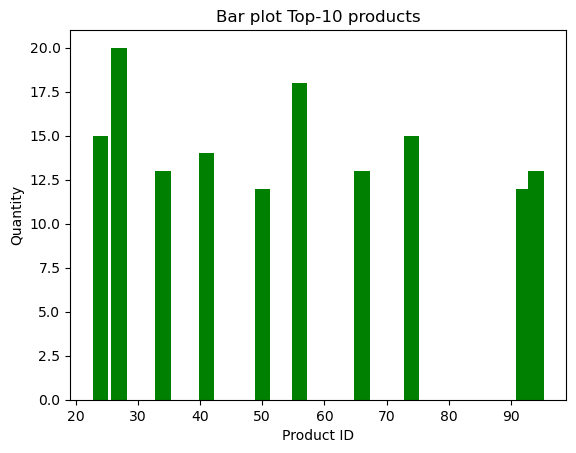

In [84]:
plt.bar(x=top_10_products['product_id'], height=top_10_products['quantity'],width=2.5, color='green')
plt.xlabel('Product ID')
plt.ylabel('Quantity')
plt.title('Bar plot Top-10 products')
# Bar plot построен с помощью библиотеки matplotlib

<Axes: xlabel='product_id', ylabel='quantity'>

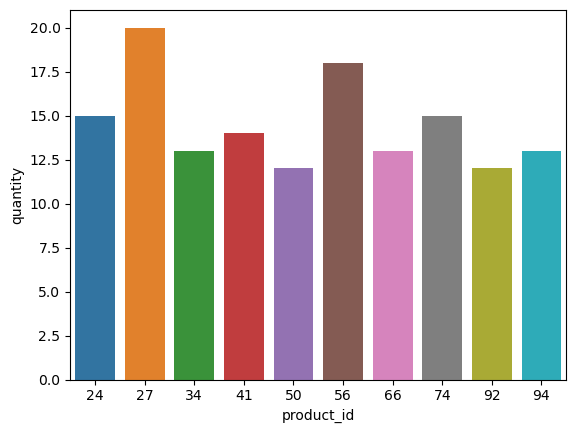

In [83]:
sns.barplot(data=top_10_products, x='product_id', y='quantity')
# График построен с помощью библиотеки seaborn

In [85]:
top_10_products[top_10_products['product_id'] == 56]

,product_id,quantity
42,56,18


<h1>4 - Визуализируйте продажи по дням.</h1>

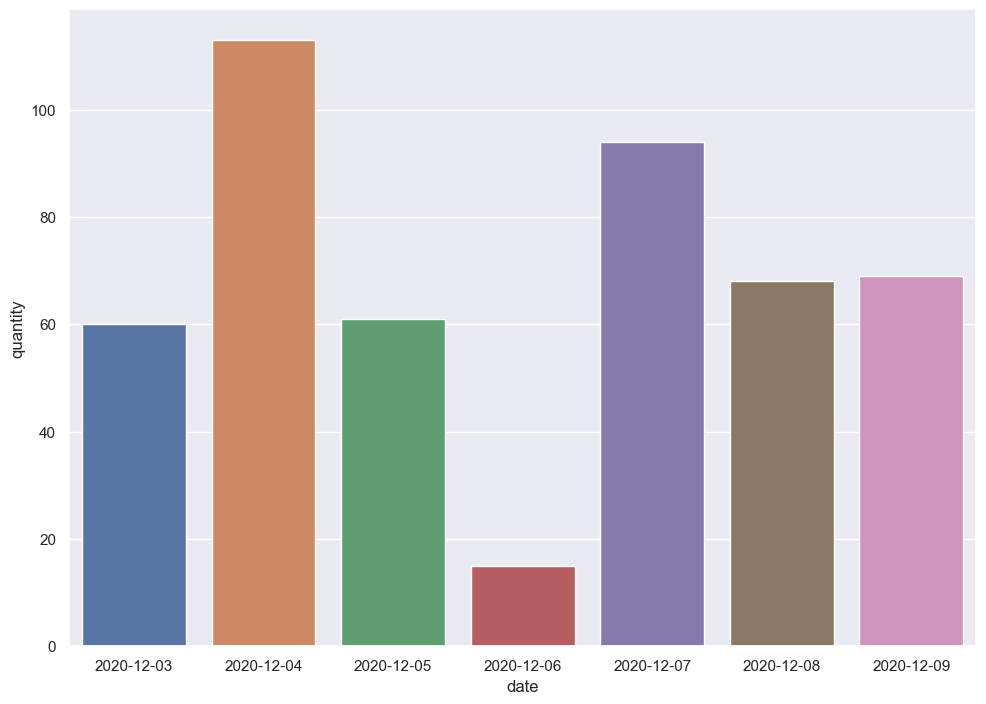

In [94]:
sns.barplot(data=df.groupby('date', as_index=False).agg({'quantity':'sum'}), x='date', y='quantity')
sns.set_theme(rc={'figure.figsize':(12,8.27)})

<h1>5 - Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.</h1>

In [95]:
df

,product_id,quantity,name,date,Unnamed: 0
0,47,1,Alexey_Smirnov,2020-12-03,0.0
1,57,1,Alexey_Smirnov,2020-12-03,1.0
2,14,2,Alexey_Smirnov,2020-12-03,2.0
3,52,1,Alexey_Smirnov,2020-12-03,3.0
4,1,4,Alexey_Smirnov,2020-12-03,4.0
...,...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09,1.0
157,39,2,Rostislav_Petrov,2020-12-09,2.0
158,82,4,Vasiliy_Ivanov,2020-12-09,0.0
159,74,2,Vasiliy_Ivanov,2020-12-09,1.0


In [96]:
other_date = df.groupby(['name','product_id'], as_index=False).agg({'date':'count'}).query('date > 1')

In [97]:
other_date

,name,product_id,date
30,Alexey_Smirnov,55,2
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
